## ViTの実装

In [2]:
#### 1. Modelの読み込み
import torch
import torch.nn as nn
from vit import ViT
import matplotlib.pyplot as plt
batch_size = 2
channel = 3 
img_size= 256
num_classes = 10


model = ViT(in_channels = channel,
            image_size = img_size,
            num_classes = num_classes)

ViT is implemented


In [3]:
x = torch.randn(batch_size, channel, img_size, img_size)
print("Input shape is ",x.shape)
pred = model(x)
print("Output shape is ",pred.shape)

Input shape is  torch.Size([2, 3, 256, 256])
Output shape is  torch.Size([2, 10])


In [4]:
pred

tensor([[-0.0771, -0.4059,  0.6943, -0.1961, -0.9196,  0.7649,  0.3283,  0.7955,
         -0.9483,  0.6253],
        [ 0.5968, -0.2667,  0.9297, -0.6598, -0.8422,  1.1744,  0.2340, -0.2619,
         -0.5193,  0.2065]], grad_fn=<AddmmBackward0>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.551209..4.3924084].


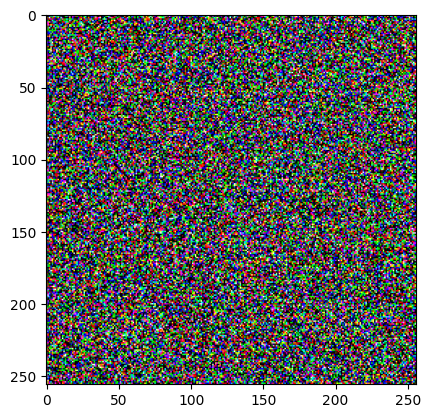

In [5]:
plt.imshow(x[0].permute(1, 2, 0))
plt.show()



### visualize the model

In [6]:
import torchsummary
from torchsummary import summary

# Assuming your model is already defined as 'model' and is compatible with the input dimensions
summary(model, input_size=(channel, img_size, img_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 384, 16, 16]         295,296
           Dropout-2             [-1, 257, 384]               0
   ViT_input_Layer-3             [-1, 257, 384]               0
         LayerNorm-4             [-1, 257, 384]             768
            Linear-5             [-1, 257, 384]         147,456
            Linear-6             [-1, 257, 384]         147,456
            Linear-7             [-1, 257, 384]         147,456
            Linear-8             [-1, 257, 384]         147,840
Self_Attention_Layer-9             [-1, 257, 384]               0
        LayerNorm-10             [-1, 257, 384]             768
           Linear-11            [-1, 257, 1536]         591,360
             GELU-12            [-1, 257, 1536]               0
          Dropout-13            [-1, 257, 1536]               0
           Linear-14             [-1,

In [7]:
# Calculate the total number of parameters in the model
total_params = sum(p.numel() for p in model.parameters())
print("Total number of parameters: ", total_params)

Total number of parameters:  21678730


## 2. Train the model

In [8]:
torch.backends.mps.is_available()

True

In [3]:
device = torch.device('mps')